In [1]:
def df_to_dict(df):
    d={}
    for row in df.iterrows():
        k=row[1].values[0]
        v=row[1].values[1]
        if k not in d:
            d[k]=[v]
        else:
            d[k].append(v)
    return d

def group_freq(df,t):
    d={}
    vc=df[0].value_counts()
    for row in vc.items():
        if row[1]>t:
            if row[1] not in d:
                d[row[1]]=df.loc[df[0]==row[0],1].values.tolist()
            else:
                d[row[1]]+=df.loc[df[0]==row[0],1].values.tolist()
        elif row[1] not in d:
            d[row[1]]=df.loc[df[0]==row[0],1].values.tolist()
        else:
            d[row[1]]+=df.loc[df[0]==row[0],1].values.tolist()
    return d



DEBUG:matplotlib:matplotlib data path: /data/user/shapoval/.conda/envs/test_abdesign/envs/abdesign/lib/python3.10/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/data/user/shapoval/.config/matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:CACHEDIR=/data/user/shapoval/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /data/user/shapoval/.cache/matplotlib/fontlist-v330.json
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/data/user/shapoval/.conda/envs/test_abdesign/envs/abdesign/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy

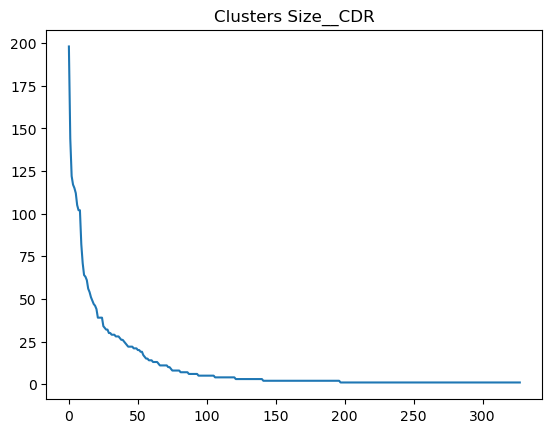

In [2]:
from pathlib import Path
import logging
import sys
from pathlib import Path
import pandas as pd

logging.basicConfig(stream=sys.stdout, level=logging.DEBUG)
id='_CDR'
summary_csv = Path(f"/data/user/shapoval/ProteinMPNN/clusterRes_0.5_DB_CDR_H3_CDR_H2_CDR_H1_CDR_L1_CDR_L2_CDR_L3.fasta_cluster.tsv")
#chothia_subdir = Path("/mnt/sabdab/chothia")
# only protein and peptide antigens
df = pd.read_csv(summary_csv,sep="\t",header=None)
clusters=df[0].value_counts()
pd.Series(clusters.values).plot(title=f'Clusters Size_{id}')
d=df_to_dict(df)

In [3]:
t=9
d_gr=group_freq(df,t)   

In [4]:
ide='_FR_08'
summary_csv = Path(f"/data/user/shapoval/ProteinMPNN/clusterRes_0.8_DB_FR_H1_FR_H2_FR_H3_FR_L1_FR_L2_FR_L3.fasta_cluster.tsv")
#chothia_subdir = Path("/mnt/sabdab/chothia")
# only protein and peptide antigens
de = pd.read_csv(summary_csv,sep="\t",header=None)
dde=df_to_dict(de)
dde_gr=group_freq(de,t)

In [5]:
s=0
for k,v in d_gr.items():
    s+=len(v)
print(s)

3522


In [6]:
dec=de[0].value_counts()

In [7]:
d_answ=pd.DataFrame(index=list(d_gr.keys()),columns=list(dde_gr.keys()))
for k_d,v_d in d_gr.items():
    for k_e,v_e in dde_gr.items():
        d_answ.loc[k_d,k_e]=len((set(v_d)).intersection(set(v_e)))

In [8]:
d_answ

,195,162,115,113,97,93,65,60,59,54,...,10,9,8,7,6,5,4,3,2,1
198,26,5,8,0,16,2,1,0,8,0,...,9,1,2,1,22,4,7,13,4,14
144,40,0,39,0,6,0,35,0,1,0,...,2,0,0,2,0,0,0,0,1,1
122,3,0,1,1,0,0,0,0,0,0,...,1,3,1,9,1,3,8,2,8,6
117,10,1,3,8,9,0,0,0,0,0,...,2,0,0,2,1,0,0,3,4,2
115,0,103,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
112,1,0,1,0,0,0,1,0,0,0,...,0,0,1,0,1,4,0,0,5,2
105,3,1,3,15,0,0,0,0,0,0,...,10,1,8,1,7,1,5,4,7,4
102,0,5,3,17,1,81,3,0,0,0,...,1,0,9,1,6,1,6,7,1,9
82,0,1,0,2,0,0,0,0,0,30,...,2,1,9,2,5,4,0,1,3,3
71,10,2,3,0,4,0,2,0,7,0,...,3,0,5,0,1,1,0,1,3,2


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7fa5c8411660>


[Text(0.5, 23.52222222222222, 'FRs cluster size'),
 Text(50.722222222222214, 0.5, 'CDRs cluster size')]

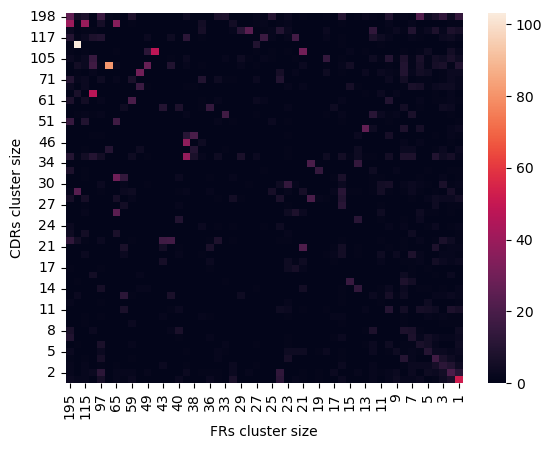

In [9]:
import seaborn as sns

d_answ=d_answ.astype(int)
d_answ.dtypes
hm=sns.heatmap(d_answ)
hm.set(xlabel='FRs cluster size', ylabel='CDRs cluster size')

In [10]:
d_answ

,195,162,115,113,97,93,65,60,59,54,...,10,9,8,7,6,5,4,3,2,1
198,26,5,8,0,16,2,1,0,8,0,...,9,1,2,1,22,4,7,13,4,14
144,40,0,39,0,6,0,35,0,1,0,...,2,0,0,2,0,0,0,0,1,1
122,3,0,1,1,0,0,0,0,0,0,...,1,3,1,9,1,3,8,2,8,6
117,10,1,3,8,9,0,0,0,0,0,...,2,0,0,2,1,0,0,3,4,2
115,0,103,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
112,1,0,1,0,0,0,1,0,0,0,...,0,0,1,0,1,4,0,0,5,2
105,3,1,3,15,0,0,0,0,0,0,...,10,1,8,1,7,1,5,4,7,4
102,0,5,3,17,1,81,3,0,0,0,...,1,0,9,1,6,1,6,7,1,9
82,0,1,0,2,0,0,0,0,0,30,...,2,1,9,2,5,4,0,1,3,3
71,10,2,3,0,4,0,2,0,7,0,...,3,0,5,0,1,1,0,1,3,2


In [11]:
import pandas as pd

df=pd.read_csv('/mnt/sabdab/clusters.tsv',sep='\t')
df

,id,renamed_clusterRes_0.5_DB_CDR_H3_CDR_H2_CDR_H1_CDR_L1_CDR_L2_CDR_L3.fasta_cluster,renamed_clusterRes_0.8_DB_FR_H1_FR_H2_FR_H3_FR_L1_FR_L2_FR_L3.fasta_cluster,renamed_clusterRes_0.5_DB_CDR_H3.fasta_cluster
0,7u0e_A+B-D,7u0e_A+B-D,6db5_H+L-P,7u0e_A+B-D
1,7uaq_H+L-A,5ifj_J+K-L,5ifj_J+K-L,7uap_M+N-B
2,5ifj_J+K-L,5ifj_J+K-L,5ifj_J+K-L,5ifj_J+K-L
3,5ig7_G+H-I,5ifj_J+K-L,5ifj_J+K-L,5ifj_J+K-L
4,7rkv_D+H-B,5ifj_J+K-L,5ifj_J+K-L,7rks_H+L-R
...,...,...,...,...
3517,5fcu_H+L-G,3iyw_H+L-A,3thm_H+L-F,4rfn_B+C-A
3518,4rfn_B+C-A,3iyw_H+L-A,3thm_H+L-F,4rfn_B+C-A
3519,6t3f_H+L-F,6t3f_H+L-F,4jo1_H+L-P,6t3f_H+L-F
3520,5bk0_B+A-E,5bk0_B+A-E,4dtg_H+L-K,5bk0_B+A-E


In [18]:
import statsmodels.api as sm

#data = df[["renamed_clusterRes_0.5_DB_CDR_H3_CDR_H2_CDR_H1_CDR_L1_CDR_L2_CDR_L3.fasta_cluster", "renamed_clusterRes_0.8_DB_FR_H1_FR_H2_FR_H3_FR_L1_FR_L2_FR_L3.fasta_cluster"]]

crosstab = pd.crosstab(df["renamed_clusterRes_0.5_DB_CDR_H3_CDR_H2_CDR_H1_CDR_L1_CDR_L2_CDR_L3.fasta_cluster"], df["renamed_clusterRes_0.8_DB_FR_H1_FR_H2_FR_H3_FR_L1_FR_L2_FR_L3.fasta_cluster"])

In [19]:
import scipy.stats as stats

stats.chi2_contingency(crosstab)


Chi2ContingencyResult(statistic=508208.18755402847, pvalue=0.0, dof=147804, expected_freq=array([[1.85625000e+00, 2.19375000e+00, 6.35625000e+00, ...,
        5.62500000e-02, 5.62500000e-02, 5.62500000e-02],
       [4.40625000e-01, 5.20738636e-01, 1.50880682e+00, ...,
        1.33522727e-02, 1.33522727e-02, 1.33522727e-02],
       [3.65625000e-01, 4.32102273e-01, 1.25198864e+00, ...,
        1.10795455e-02, 1.10795455e-02, 1.10795455e-02],
       ...,
       [9.37500000e-03, 1.10795455e-02, 3.21022727e-02, ...,
        2.84090909e-04, 2.84090909e-04, 2.84090909e-04],
       [9.37500000e-03, 1.10795455e-02, 3.21022727e-02, ...,
        2.84090909e-04, 2.84090909e-04, 2.84090909e-04],
       [9.37500000e-03, 1.10795455e-02, 3.21022727e-02, ...,
        2.84090909e-04, 2.84090909e-04, 2.84090909e-04]]))

In [14]:
rslt = table.test_nominal_association()
print(rslt)

df          147804
pvalue      1.0
statistic   49495.96799750064


In [ ]:
print(table.chi2_contribs)

renamed_clusterRes_0.8_DB_FR_H1_FR_H2_FR_H3_FR_L1_FR_L2_FR_L3.fasta_cluster  1a14_H+L-N  \
renamed_clusterRes_0.5_DB_CDR_H3_CDR_H2_CDR_H1_...                                        
1a14_H+L-N                                                                    50.300288   
1a2y_B+A-C                                                                     0.043624   
1a3r_H+L-P                                                                     0.031549   
1acy_H+L-P                                                                     0.054638   
1adq_H+L-A                                                                     0.017010   
...                                                                                 ...   
7u8g_D+E-A                                                                     0.008001   
7ur4_I+J-A                                                                     0.008001   
7y0v_H+L-R                                                                     0.008001   